In [1]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# load model
model = tf.keras.models.load_model('./models/object_detection.keras')
print('Model loaded sucessfully')


Model loaded sucessfully


In [9]:
# Load image
path = './test images/T_9.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [10]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 2973
Width of the image = 1993


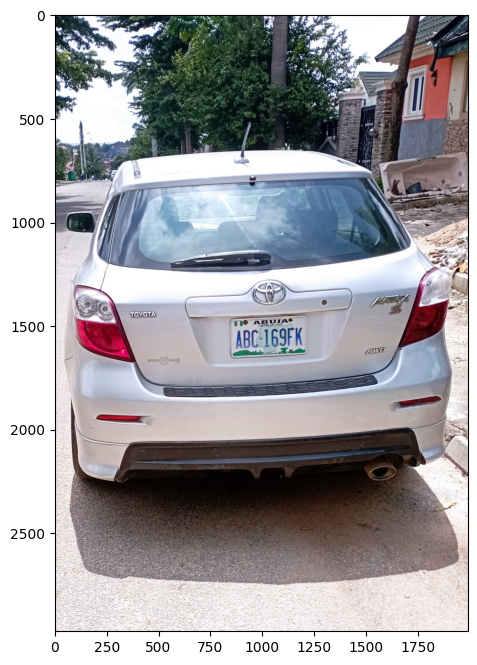

In [11]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [12]:
image_arr_224.shape

(224, 224, 3)

In [13]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [14]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


array([[0.40988368, 0.57965606, 0.47092977, 0.557008  ]], dtype=float32)

In [15]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[ 816.89817017, 1155.25453657, 1400.07421115, 1655.98486733]])

In [16]:
coords = coords.astype(np.int32)
coords

array([[ 816, 1155, 1400, 1655]])

(816, 1400) (1155, 1655)


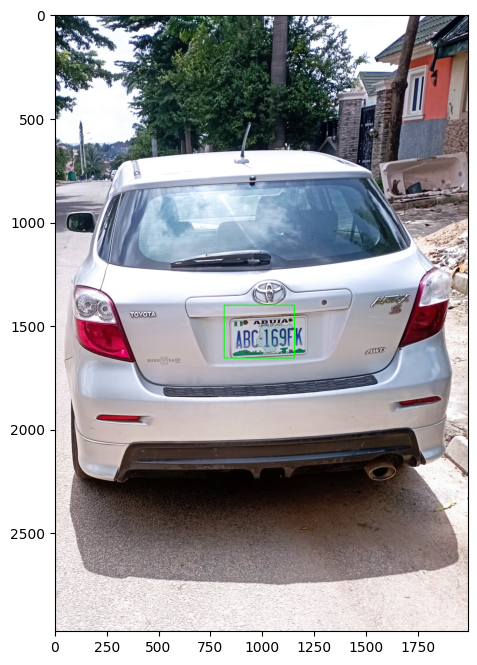

In [17]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [13]:
# create pipeline
path = './test_images/N207.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

(440, 546) (608, 588)


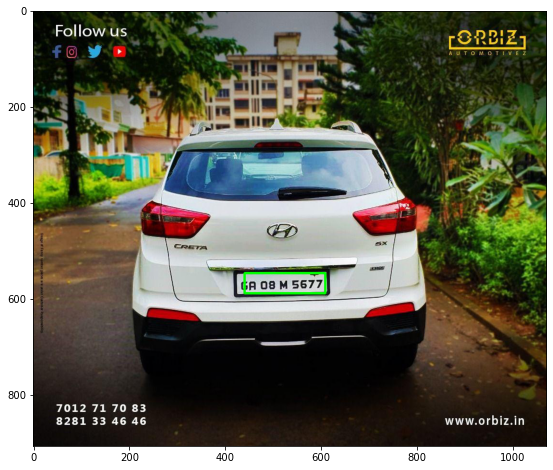

In [14]:
path = './test_images/N147.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [15]:
import pytesseract as pt

(218, 284) (336, 311)


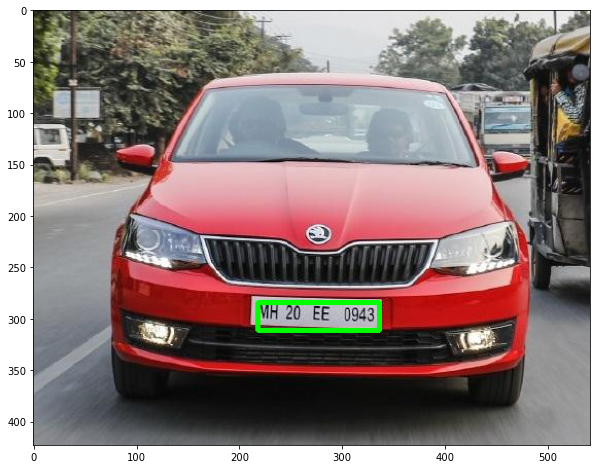

In [16]:
path = './test_images/N207.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

array([218, 336, 284, 311])

In [20]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

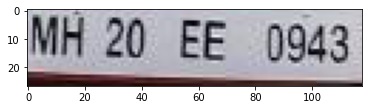

In [21]:
plt.imshow(roi)
plt.show()

In [23]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

MN 20 EE D943


